<a href="https://colab.research.google.com/github/bahram3000/google_colab/blob/main/give_me_future_return.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

In [6]:
gold_df=yf.download(tickers='GC=F',interval='1d',period='max')

/tmp/ipython-input-6-1489891016.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gold_df=yf.download(tickers='GC=F',interval='1d',period='max')
[*********************100%***********************]  1 of 1 completed


In [7]:
from my_func_pkg import exp_change

In [8]:
closes=gold_df['Close'].values[:,0]

In [9]:
closes.shape

(6234,)

In [10]:
ret_g=exp_change(closes)

In [11]:
ret_g=exp_change(closes)

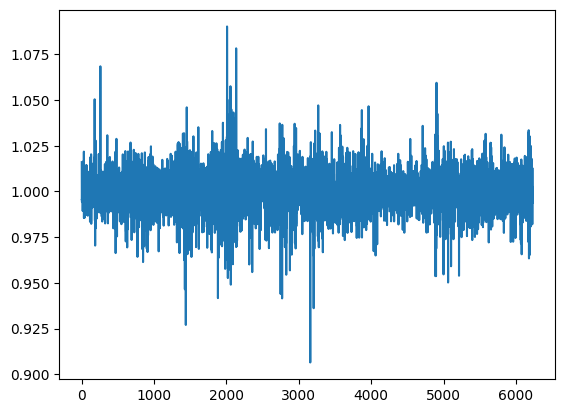

In [12]:
plt.plot(ret_g)
plt.show()

In [13]:
from my_func_pkg import build_data_for_auto_NN
from my_func_pkg import find_best_period_for_dependency

In [14]:
fbpfd=find_best_period_for_dependency(closes,overlay=False)

100%|██████████| 3113/3113 [12:07<00:00,  4.28it/s] 


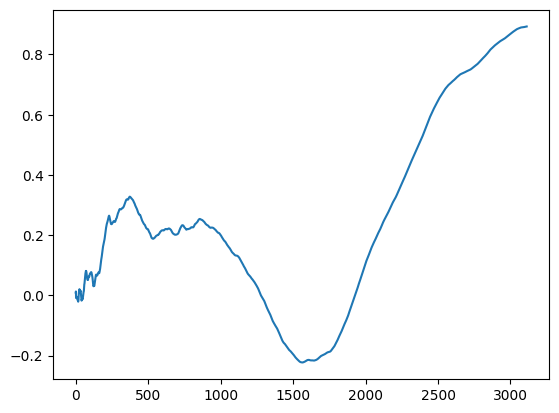

In [15]:
plt.plot(fbpfd)

In [16]:
from my_func_pkg import inflection_points

In [17]:
fbpfdun=find_best_period_for_dependency(closes,overlay=True)

100%|██████████| 6229/6229 [25:48<00:00,  4.02it/s] 


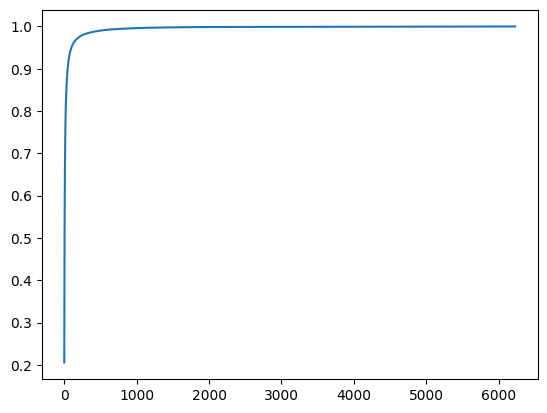

In [18]:
plt.plot(fbpfdun)

In [19]:
from my_func_pkg import find_pivot

In [20]:
fp=find_pivot(fbpfd)

In [21]:
fp

(array([  24,   70,  106,  230,  372,  642,  737,  855, 1606]),
 array([  40,  122,  248,  534,  690,  763, 1564, 1641]))

In [22]:
ip=inflection_points(fbpfd)

In [ ]:
min_ind=np.where(fbpfd[fp[0]]==np.min(fbpfd[fp[0]]))[0][0]

In [ ]:
fp[0][min_ind]

np.int64(1606)

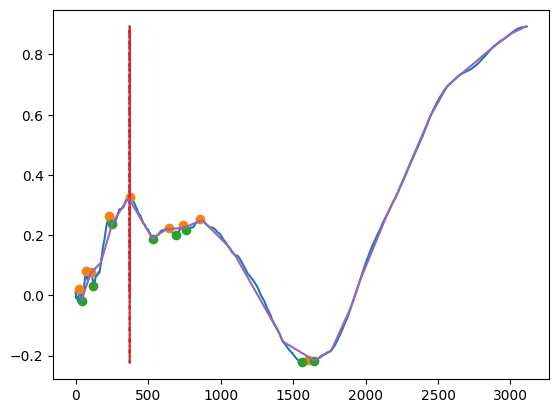

In [45]:
plt.plot(fbpfd)
plt.plot(fp[0],fbpfd[fp[0]],'o')
plt.plot(fp[1],fbpfd[fp[1]],'o')
plt.plot([372]*len(fbpfd),fbpfd,'--')
plt.plot(fnki,fbpfd[fnki])
plt.show()

In [27]:
"""def build_data_for_auto_NN(inp_data,len_x:int,len_y:int):
  ln=len(inp_data)
  x=[]
  y=[]
  for i in range(ln):
    if i+len_x<ln and i+len_x+len_y<ln:
      x.append(inp_data[i:i+len_x])
      y.append(inp_data[i+len_x:i+len_x+len_y])
  return np.array(x),np.array(y)"""

'def build_data_for_auto_NN(inp_data,len_x:int,len_y:int):\n  ln=len(inp_data)\n  x=[]\n  y=[]\n  for i in range(ln):\n    if i+len_x<ln and i+len_x+len_y<ln:\n      x.append(inp_data[i:i+len_x])\n      y.append(inp_data[i+len_x:i+len_x+len_y])\n  return np.array(x),np.array(y)'

In [28]:
fb_ret=find_best_period_for_dependency(ret_g)

100%|██████████| 3112/3112 [12:22<00:00,  4.19it/s] 


In [31]:
from my_func_pkg import fix_num_key_index

In [43]:
fnki=fix_num_key_index(fb_ret,point_num=35,max_iter=100)

100%|██████████| 100/100 [00:00<00:00, 1601.24it/s]


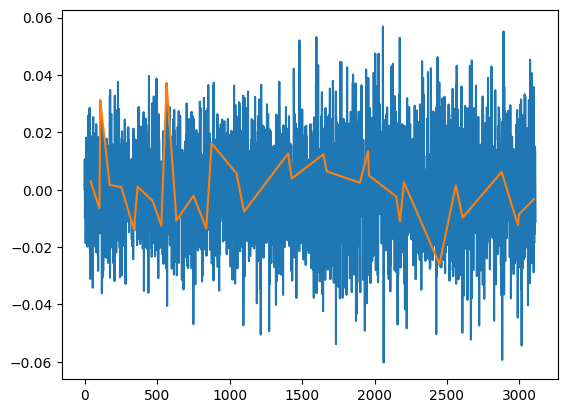

In [44]:
plt.plot(fb_ret)
plt.plot(fnki,fb_ret[fnki])

In [46]:
fp[0]

array([  24,   70,  106,  230,  372,  642,  737,  855, 1606])

In [47]:
fnki

array([  41,  102,  108,  173,  253,  340,  365,  470,  529,  565,  626,
        632,  751,  839,  876, 1048, 1100, 1404, 1429, 1647, 1670, 1765,
       1899, 1956, 1961, 2150, 2176, 2203, 2448, 2561, 2608, 2877, 2990,
       2997, 3100])

In [48]:
from my_func_pkg import build_data_for_auto_NN

In [70]:
preve_len=839

In [71]:
x,y=build_data_for_auto_NN(ret_g,preve_len,30)

In [72]:
x.shape

(5364, 839)

In [73]:
x.reshape(x.shape[0],x.shape[1],1).shape

(5364, 839, 1)

In [74]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses

In [75]:
model = models.Sequential([
    layers.LSTM(100,return_sequences=True ,input_shape=(preve_len,1)),
    layers.LSTM(60,return_sequences=True ),
    layers.LSTM(30)  # خروجی با همان ابعاد ورودی
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [76]:
model.compile(
    optimizer='adam',
    loss='mse'
)

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
n_batch=20

In [82]:
x.shape[0]//20

268

In [84]:
n_batch=20
epc=n_batch+1
batchsz=x.shape[0]//20

In [85]:
model.fit(x_train, y_train, epochs=epc, batch_size=batchsz)

Epoch 1/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - loss: 1.6166e-04
Epoch 2/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - loss: 1.6496e-04
Epoch 3/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - loss: 1.6079e-04
Epoch 4/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - loss: 1.6093e-04
Epoch 5/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - loss: 1.5898e-04
Epoch 6/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - loss: 1.5820e-04
Epoch 7/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - loss: 1.5820e-04
Epoch 8/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - loss: 1.5891e-04
Epoch 9/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - loss: 1.5545e-04
Epoch 10/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - loss: 1.5654e-04
Epoch 11/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - loss: 1.5289e-04
Epoch 12/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - loss: 1.5548e-04
Epoch 13/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - loss: 1.5435e-04
Epoch 14/21
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - loss: 1.5478e-04
E

In [86]:
model.evaluate(x_test,y_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 1.4125e-04


0.00014566603931598365

In [87]:
y_end=model.predict(x)

168/168 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step


In [88]:
def base_cenarios_by_given_future_dt(future_dt:np.ndarray,l_cenarios:int,base_dt:np.ndarray):
  b_cenarios=np.zeros((l_cenarios,))
  for j in range(l_cenarios):
      if j==0:
        b_cenarios[j]=base_dt[-1]*future_dt[0]
      else:
        b_cenarios[j]=b_cenarios[j-1]*future_dt[j]
  return b_cenarios

In [89]:
bc=base_cenarios_by_given_future_dt(y_end[-1],l_cenarios=30,base_dt=closes)

In [90]:
from my_func_pkg import most_frequency_cenarios

In [91]:
mfc=most_frequency_cenarios(closes,10,0.92,100,lcenarios=30)

100%|██████████| 100/100 [00:34<00:00,  2.94it/s]


In [92]:
mfc

array([3079.34013231, 3190.4695831 , 3301.59903388, 3412.72848466,
       3523.85793545, 3634.98738623])

In [93]:
bc

array([3297.45293571, 3286.33840017, 3272.65924412, 3256.73271559,
       3239.12888192, 3219.0022132 , 3201.75159963, 3189.03426173,
       3172.90833836, 3162.82653631, 3148.57599656, 3135.95501795,
       3119.65338334, 3110.3027253 , 3092.52341303, 3079.09063901,
       3068.64018172, 3057.61392417, 3044.78366554, 3029.87590555,
       3013.31790199, 2996.90103584, 2986.12808611, 2979.13799858,
       2968.02031194, 2957.43202652, 2942.78043726, 2927.56401841,
       2916.95777741, 2900.32296927])

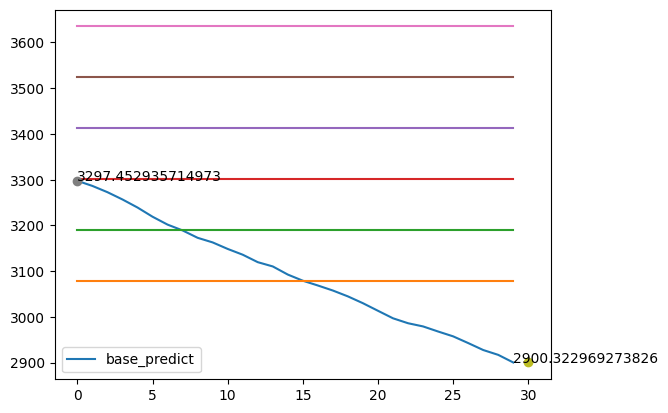

In [94]:
plt.plot(bc)
plt.plot([mfc[0]]*30)
plt.plot([mfc[1]]*30)
plt.plot([mfc[2]]*30)
plt.plot([mfc[3]]*30)
plt.plot([mfc[4]]*30)
plt.plot([mfc[5]]*30)
plt.legend(['base_predict'])
plt.plot([0],[bc[0]],'o')
plt.text(x=0,y=bc[0],s=f'{bc[0]}')
plt.plot([30],[bc[-1]],'o')
plt.text(x=29,y=bc[-1],s=f'{bc[-1]}')
plt.show()
